In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("27-mall_customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

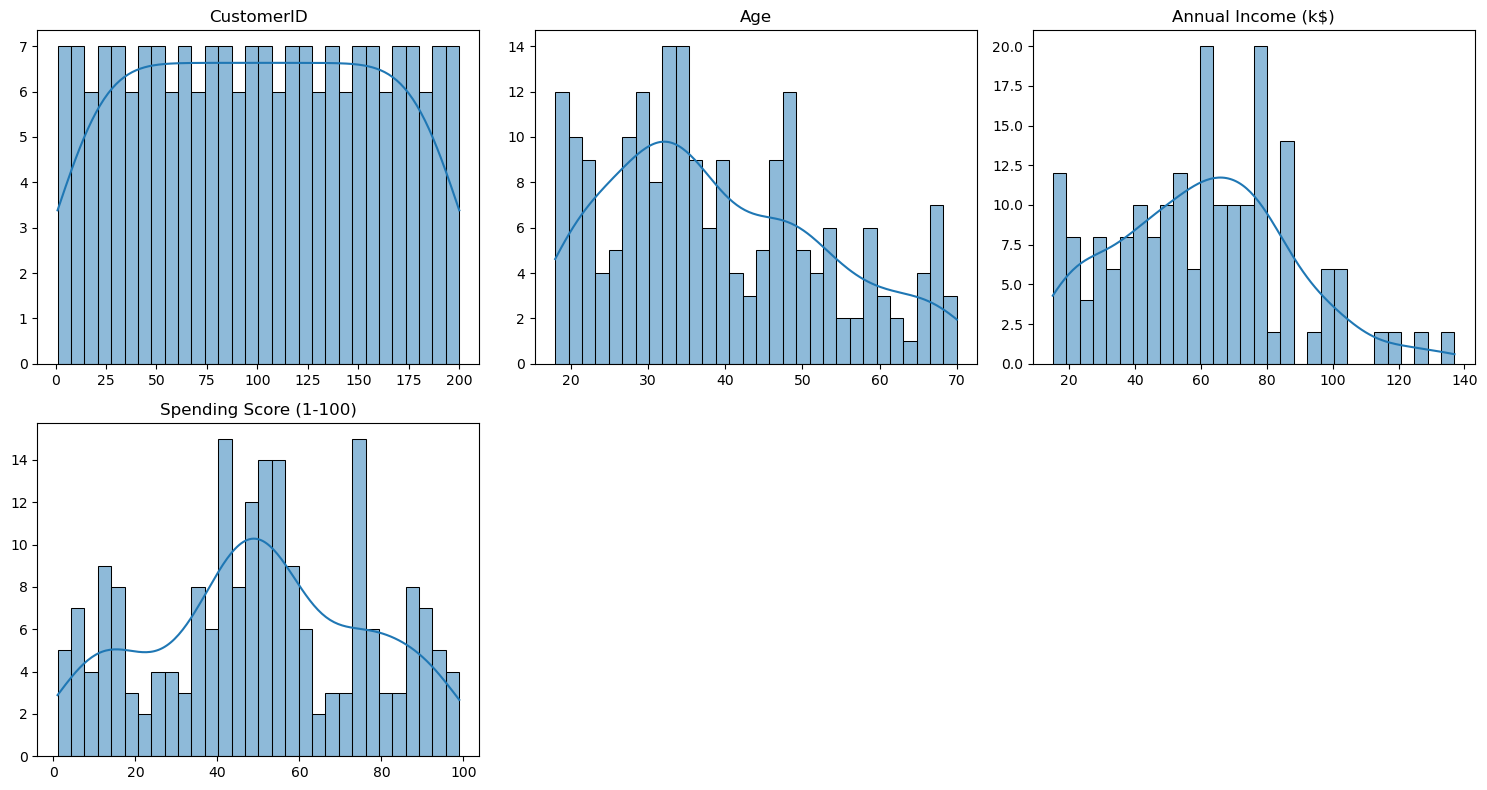

In [9]:

plot_all_histograms(df)

In [10]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [14]:
df = df.drop('CustomerID', axis=1)

In [15]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [18]:
df = pd.DataFrame(df_scaled, columns = df.columns)

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


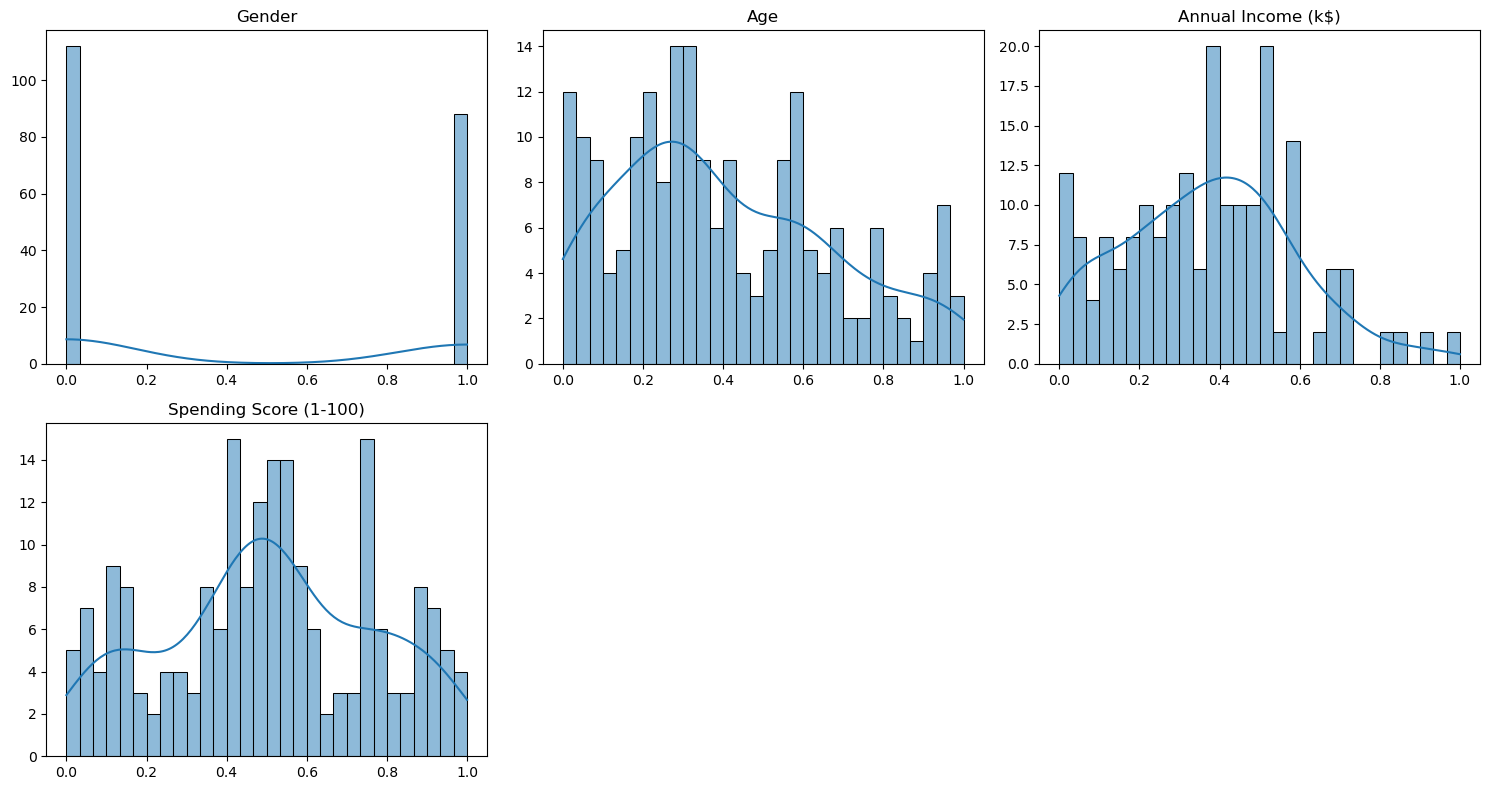

In [20]:
plot_all_histograms(df)

In [21]:
import scipy.cluster.hierarchy as sch

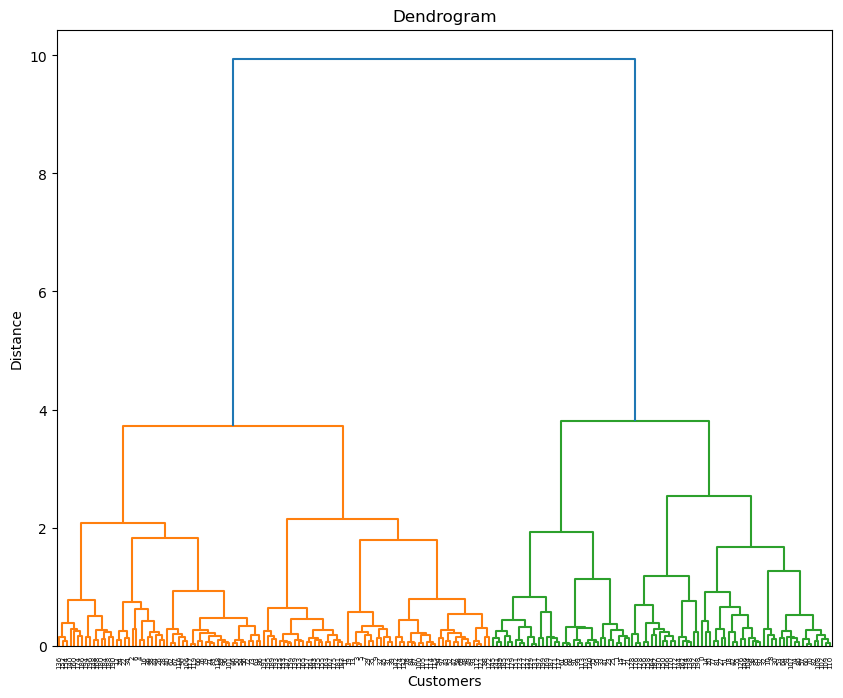

In [22]:
plt.figure(1, figsize = (10,8))
dendrogram = sch.dendrogram(sch.linkage(df, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()

In [23]:
# we can clearly select 4 to 6 clusters from this dendrogram, let's go for 4

from sklearn.cluster import AgglomerativeClustering

In [24]:
hc = AgglomerativeClustering(n_clusters=4)

In [25]:
y_hc = hc.fit_predict(df)

In [26]:
df['cluster'] = pd.DataFrame(y_hc)

In [27]:

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1.0,0.019231,0.000000,0.387755,0
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008197,0.051020,3
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,3


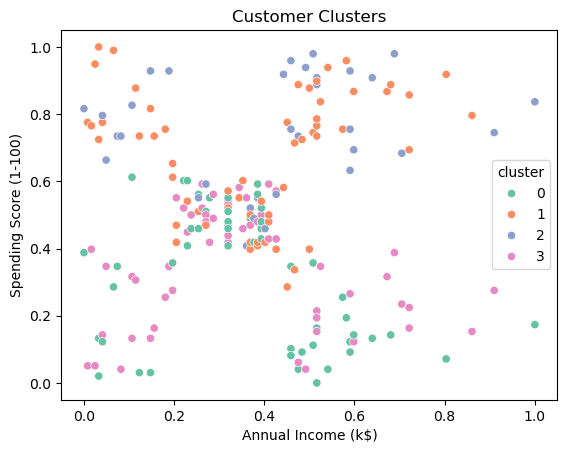

In [28]:
sns.scatterplot(data=df, x = "Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [29]:
# it does not look good on the graph, maybe we cannot visualize it properly since we have 4 features
# maybe algorithm doesn't do a good job. let's try to see silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(df, y_hc))

0.7143503785893516


In [30]:
# i will try this with only income and spending score to see if we get a better score
X = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()

In [31]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [70]:
hc = AgglomerativeClustering(n_clusters=5)
y_hc = hc.fit_predict(X)
X["cluster"] = y_hc

In [72]:
X

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,4
1,0.000000,0.816327,3
2,0.008197,0.051020,4
3,0.008197,0.775510,3
4,0.016393,0.397959,4
...,...,...,...
195,0.860656,0.795918,0
196,0.909836,0.275510,1
197,0.909836,0.744898,0
198,1.000000,0.173469,1


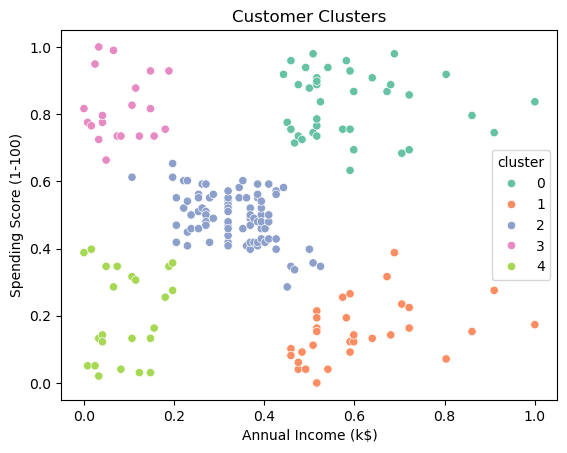

In [74]:
sns.scatterplot(data=X, x = "Annual Income (k$)", y="Spending Score (1-100)", hue="cluster", palette = "Set2")
plt.title("Customer Clusters")
plt.show()

In [76]:
print(silhouette_score(X, y_hc))

0.8524094908064438


In [78]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

In [80]:
df = pd.read_csv("27-mall_customers.csv")
df = df.drop("CustomerID", axis = 1)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

features_2d = ["Annual Income (k$)","Spending Score (1-100)"]
features_3d = ["Age","Annual Income (k$)","Spending Score (1-100)"]
features_4d = ["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]

for feats in [features_2d,features_3d,features_4d]:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    hc = AgglomerativeClustering(n_clusters=5)
    y_hc = hc.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)

    
    print(f"\n features :{feats}")
    print("Silhoutte score: ", sil)
    print("Davies Bouldin score: ", db)
    print("Calinski Harabasz score: ", ch)
    print("-------------")


 features :['Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.5582698727196419
Davies Bouldin score:  0.5734519252471811
Calinski Harabasz score:  258.97400737720704
-------------

 features :['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.3955454334726547
Davies Bouldin score:  0.8746143334035464
Calinski Harabasz score:  123.99070840826577
-------------

 features :['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.35032447507156306
Davies Bouldin score:  1.0941951795238571
Calinski Harabasz score:  163.46602356383625
-------------
